In [2]:
from dll.spin_procesor import Quantum_Spin_Proces
from qutip import basis
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
""""
(self, h = 1, gir = 1.760e11, B0 = 10e-3, nf = 1, N_qubits = 1, J = 1, tf_noise = False,
noise_std = 0.01, B1_offset = 0, n_points_pulse_Ri = 100,
n_points_pulse_2Qbits = 100, n_swap = 1, T1 = 1e3, T2 = 1e3,
tf_quantum_noise = False)
"""

In [3]:
angle = 8*np.pi

In [4]:
procesor_1 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000)
ket_0 = basis(2, 0)
out = procesor_1.Rx(angle, ket_0, tf_expect=False)
t = procesor_1.tlist
M = [a.full() for a in out.states]
over = np.array([[1, 0]])
s = [np.abs(over @ m)[0][0] for m in M]

In [5]:
procesor_2 = Quantum_Spin_Proces(tf_noise = True, noise_std = 0.00032, n_points_pulse_Ri = 100)
ket_0 = basis(2, 0)
out = procesor_2.Rx(angle, ket_0, tf_expect=False)
t2 = procesor_2.tlist
M = [a.full() for a in out.states]
over2 = np.array([[1, 0]])
s2 = [np.abs(over2 @ m)[0][0] for m in M]

In [6]:
procesor_3 = Quantum_Spin_Proces(tf_noise = True, noise_std = 0.00032, n_points_pulse_Ri = 100, tf_quantum_noise = True, T1=3e-7, T2 = 2e-8)
ket_0 = basis(2, 0)
out = procesor_3.Rx(angle, ket_0, tf_expect=False)
t3 = procesor_3.tlist
M = [a.full() for a in out.states]
over2 = np.array([[1, 0]])
s3 = [np.abs(over2 @ m)[0][0] for m in M]

In [7]:
procesor_2.ω_x

1760000000.0

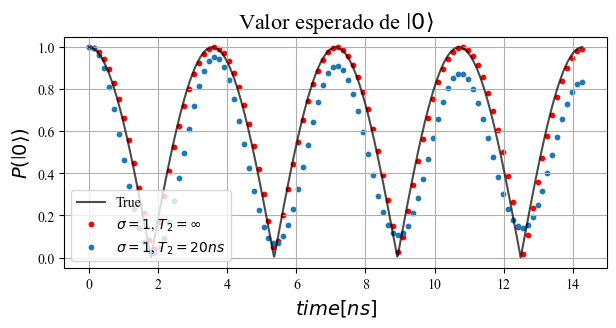

In [8]:
plt.figure(figsize=(7,3))
plt.rcParams['font.family'] = 'Times New Roman'
plt.plot(t*1e9,s, c='black',alpha=0.7, label = "True")
plt.scatter(t2*1e9,s2, c='red',  s=10, label = r"$\sigma = 1$, $T_2 =\infty $")
plt.scatter(t3*1e9,s3,  s=10, label = r"$\sigma = 1$, $T_2 =20ns$")
plt.ylabel(r'$P(\left| 0 \right\rangle)$', fontsize=14)
plt.xlabel(r'$time [ns]$', fontsize=14)
plt.title(r'Valor esperado de $\left| 0 \right\rangle$', fontsize=16)
plt.legend()
plt.grid()

# Rabi oscilaciones quitando el detuning

In [9]:
from dll.spin_procesor_B1_cte import Quantum_Spin_Proces
from qutip import basis
import numpy as np

import matplotlib.pyplot as plt

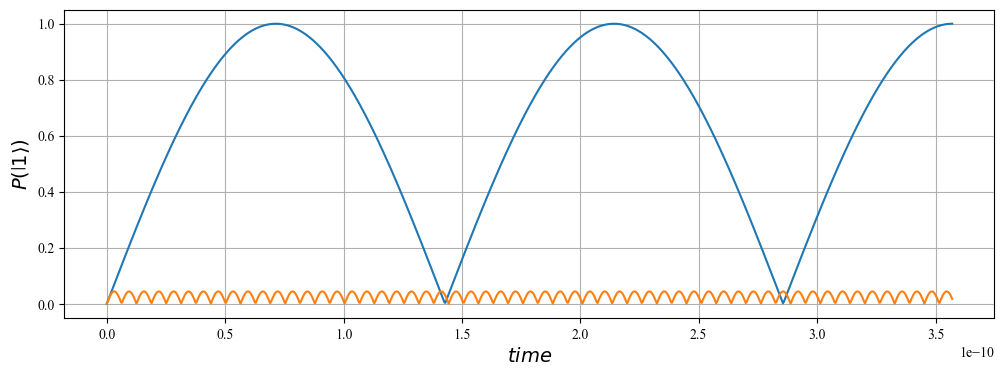

In [10]:
procesor_1 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, B0 = 5)
ket_0 = basis(2, 0)
out = procesor_1.Rx(5*np.pi, ket_0, tf_expect=False)
t = procesor_1.tlist
M = [a.full() for a in out.states]
over = np.array([[0, 1]])
s1 = [np.abs(over @ m)[0][0] for m in M]


procesor_1 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, f_rage = 1000000000000, B0 = 5)
ket_0 = basis(2, 0)
out = procesor_1.Rx(5*np.pi, ket_0, tf_expect=False)
t = procesor_1.tlist
M = [a.full() for a in out.states]
over = np.array([[0, 1]])
s = [np.abs(over @ m)[0][0] for m in M]

plt.figure(figsize=(12,4))
plt.plot(t,s1)
plt.plot(t,s)
plt.ylabel(r'$P(\left| 1 \right\rangle)$', fontsize=14)
plt.xlabel(r'$time$', fontsize=14)
plt.grid()

# II. Rabi chevrons PLOTS

# 0. Intento 2 con RWA

In [11]:
f_range = np.linspace( -1760000000.0*0.4, 1760000000.0*0.4, 300)
ket_0 = basis(2, 0)
over = np.array([[1, 0]])
S = []
angle = 5*np.pi

for fi in f_range:
    procesor_1 = Quantum_Spin_Proces(n_points_pulse_Ri = 300, f_rage = fi)
    out = procesor_1.Rx(angle, ket_0, tf_expect=False)
    t = procesor_1.tlist
    M = [a.full() for a in out.states]
    over = np.array([[0, 1]])
    s = [np.abs(over @ m)[0][0] for m in M]
    S.append(s)

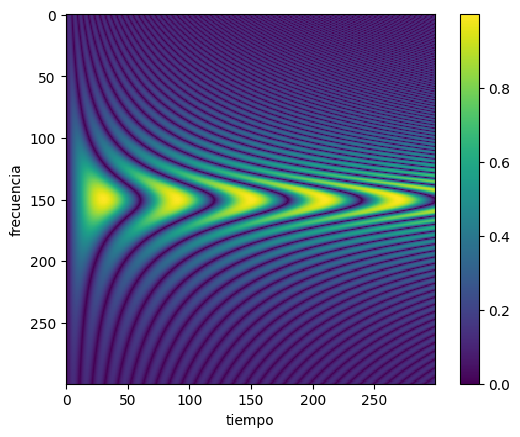

In [52]:
# Crear la figura y el eje para la imagen
fig, ax = plt.subplots()

datos_np = np.array(S)

# Mostrar la imagen con intensidades normalizadas
imagen = ax.imshow(datos_np, cmap='viridis', interpolation='nearest')

# Agregar barra de colores
fig.colorbar(imagen)

# Agregar etiquetas de los ejes
ax.set_xlabel('tiempo')
ax.set_ylabel('frecuencia')

# Mostrar la imagen
plt.show()

## 1. Intento 1 con RWA

In [14]:
from dll.spin_procesor import Quantum_Spin_Proces as QSP_b1_var


In [23]:
f_range = np.linspace( -1760000000.0*0.7, 1760000000.0*0.7, 300)
ket_0 = basis(2, 0)
over = np.array([[1, 0]])
S = []
B1 = []
angle = 5*np.pi

for fi in f_range:
    procesor_1 = QSP_b1_var(n_points_pulse_Ri = 300, f_rage = fi)
    out = procesor_1.Rx(angle, ket_0, tf_expect=False)
    B1.append(procesor_1.B1)
    t = procesor_1.tlist
    M = [a.full() for a in out.states]
    over = np.array([[0, 1]])
    s = [np.abs(over @ m)[0][0] for m in M]
    S.append(s)
    

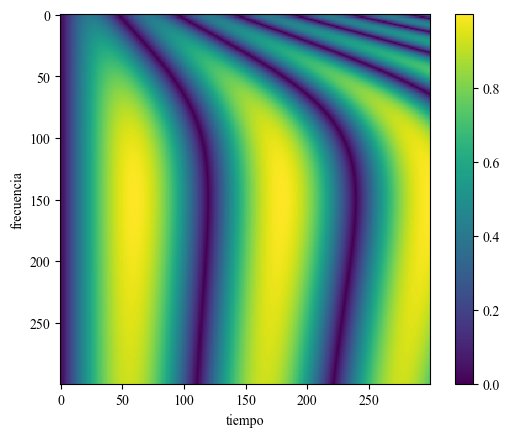

In [24]:
# Crear la figura y el eje para la imagen
fig, ax = plt.subplots()

datos_np = np.array(S)

# Mostrar la imagen con intensidades normalizadas
imagen = ax.imshow(datos_np, cmap='viridis', interpolation='nearest')

# Agregar barra de colores
fig.colorbar(imagen)

# Agregar etiquetas de los ejes
ax.set_xlabel('tiempo')
ax.set_ylabel('frecuencia')

# Mostrar la imagen
plt.show()

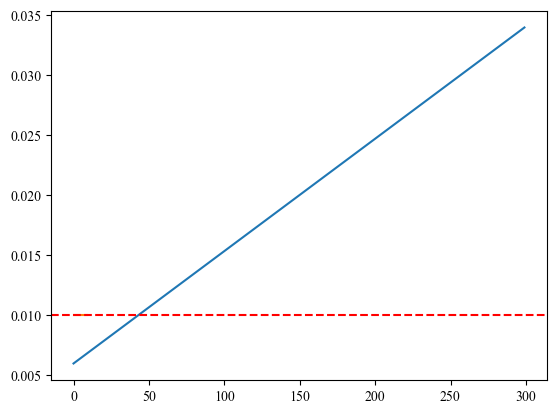

In [27]:
plt.plot(B1)
# Datos del gráfico
x = range(10)
y = [procesor_1.B0 for i in x]

# Crear el gráfico
plt.plot(x, y)

# Agregar una línea punteada horizontal en y = 50
plt.axhline(y=procesor_1.B0, color='r', linestyle='--')

## 2. Intento 2 sin RWA.

In [ ]:
from qutip import sigmax, sigmay, sigmaz, mesolve
from dll.main_fun import pulse_x_cos

In [ ]:
# Parametros para fijar frecuencia de larmor
h = 1
# factor giromagnetico:
gir = 1.760e11
# angulo deseado:
alpha = 20*np.pi
# Campo homogeneo:
B0 = 10e-3
print(f"B0 = {B0} [T]")
# Para girar univamente en el eje x se necesita hacer que
# wz = wx:
ω_z = gir*B0

f_range = np.linspace( -1760000000.0*1.1, 0.1, 300)
ket_0 = basis(2, 0)
over = np.array([[1, 0]])
S = []

for fi in f_range:
    ω_x = gir*B0 + fi
    # Delta de tiempo para que se mueva el espin a un ciclo:
    delt_t = (2*np.pi*5)/ω_x
    print(f"tiempo = {delt_t} [s]")
    # Calculo de B1:
    B1 = (alpha*2)/(gir*delt_t)
    print(f"B1 = {B1} [T]")
    # Omega x:
    O_x = gir*(B1/2)

    # Simulacion sin RWA:
    up = basis(2,0)
    H0 = (h/2)*(ω_z)*sigmaz()
    H1 = (h)*O_x*sigmax()
    H = [H0,[H1, pulse_x_cos]]
    args = {"t_init": 0, "t_final": delt_t, "w":ω_x}
    c_ops = []
    e_ops = [sigmax(), sigmay(), sigmaz()]
    tlist  = np.linspace(0, delt_t, 200)
    output_time = mesolve(H, up, tlist, c_ops, [], args)
    t = tlist
    M = [a.full() for a in output_time.states]
    s = [np.abs(over @ m)[0][0] for m in M]
    S.append(s)

B0 = 0.01 [T]
tiempo = -1.784995825903289e-07 [s]
B1 = -0.004000000000000005 [T]
tiempo = -1.8531727498129726e-07 [s]
B1 = -0.0038528428093569547 [T]
tiempo = -1.9267644474630796e-07 [s]
B1 = -0.003705685618713899 [T]
tiempo = -2.0064426764981326e-07 [s]
B1 = -0.0035585284280708488 [T]
tiempo = -2.092995105685649e-07 [s]
B1 = -0.0034113712374277926 [T]
tiempo = -2.18735144242335e-07 [s]
B1 = -0.003264214046784742 [T]
tiempo = -2.2906169611712094e-07 [s]
B1 = -0.0031170568561416923 [T]
tiempo = -2.4041159997956994e-07 [s]
B1 = -0.002969899665498636 [T]
tiempo = -2.5294490614055945e-07 [s]
B1 = -0.002822742474855586 [T]
tiempo = -2.6685687597936484e-07 [s]
B1 = -0.0026755852842125297 [T]
tiempo = -2.823882285508613e-07 [s]
B1 = -0.002528428093569479 [T]
tiempo = -2.9983918649652947e-07 [s]
B1 = -0.0023812709029264285 [T]
tiempo = -3.195890730340559e-07 [s]
B1 = -0.0022341137122833727 [T]
tiempo = -3.421241999809956e-07 [s]
B1 = -0.0020869565216403226 [T]
tiempo = -3.6807844963749127e-07 

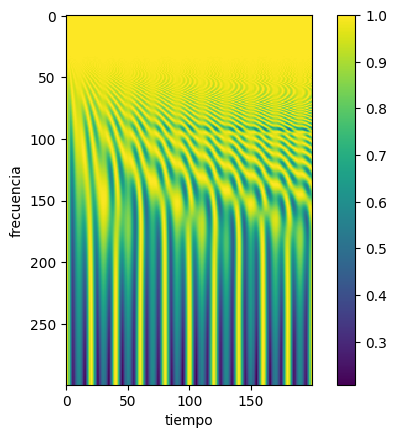

In [ ]:
# Crear la figura y el eje para la imagen
fig, ax = plt.subplots()

datos_np = np.array(S)

# Mostrar la imagen con intensidades normalizadas
imagen = ax.imshow(datos_np, cmap='viridis', interpolation='nearest')

# Agregar barra de colores
fig.colorbar(imagen)

# Agregar etiquetas de los ejes
ax.set_xlabel('tiempo')
ax.set_ylabel('frecuencia')

# Mostrar la imagen
plt.show()

In [ ]:
from qutip import Bloch

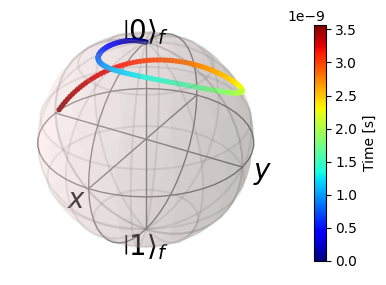

In [ ]:
import matplotlib as mpl
from matplotlib import cm
## create Bloch sphere instance ##
fig = plt.figure(constrained_layout=True)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
b=Bloch()
b.axes = ax1
b.fig = fig
## normalize colors to times in tlist ##
nrm = mpl.colors.Normalize(0,delt_t)
colors = cm.jet(nrm(tlist))
## add data points from expectation values ##
b.add_points([output_time.expect[0],output_time.expect[1],output_time.expect[2]],'m')
## customize sphere properties ##
b.point_color=list(colors)
b.point_marker=['o']
b.point_size=[8]
b.view=[-9,11]
b.zlpos=[1.1,-1.2]
b.zlabel=['$\left|0\\right>_{f}$','$\left|1\\right>_{f}$']
## plot sphere ##
## Add color bar ##
sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=nrm)
sm.set_array([])  # You need to set a dummy array for the right scaling
cbar = plt.colorbar(sm, ax = ax1, orientation='vertical', shrink=0.5)
cbar.set_label('Time [s]')
b.render()
plt.show()

# Pruebas FIG 1.

In [1]:
from dll.main_fun import make_IRIS_v2
from dll. baseline_dru import Modelo_DRU
from dll.models import qcircuit_1_qubit_mixed
from dll.cost_fub import fidelity_cost

In [ ]:
""""
self, modelo, f_loss, num_layers = 10, learning_rate = 0.1,
               epochs = 10, batch_size = 32, n_clases = 3, n_qubits = 1,
               random_state = 42, save_process = True, entanglement = False,
               path_save_w0 = "", path_save_states_0="", file_name_w = "test_w",
               file_name_state = "test_states", val_prc = 0.3, features = 2,
               alpha_noise = 0.0, excel_file_experimente = 'resultados_clasificacion.xlsx',
               save_w_states = False, verbose_test = False, save_excel_result = False

"""

In [2]:
N_layeres = 1
n_classes = 3
n_features = 2
X, y =  make_IRIS_v2(n_features, n_classes)

In [3]:
model = Modelo_DRU(qcircuit_1_qubit_mixed, fidelity_cost,
                   epochs = 1, n_clases = n_classes, n_qubits = 1,
                   features = n_features, alpha_noise = 0.0, save_process=False,
                   num_layers = N_layeres)

paramters_1q, bias_1q = model.fit(X, y)

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]c:\Users\UNALMAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\autograd\numpy\numpy_vjps.py:99: RuntimeWarning: divide by zero encountered in power
  defvjp(anp.sqrt,    lambda ans, x : lambda g: g * 0.5 * x**-0.5)
c:\Users\UNALMAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\autograd\numpy\numpy_wrapper.py:156: ComplexWarning: Casting complex values to real discards the imaginary part
  return A.astype(dtype, order, casting, subok, copy)
c:\Users\UNALMAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\autograd\numpy\numpy_vjps.py:99: RuntimeWarning: invalid value encountered in power
  defvjp(anp.sqrt,    lambda ans, x : lambda g: g * 0.5 * x**-0.5)
Epoch: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]


In [4]:
paramters_1q

tensor([[0.51727382, 1.19178796, 0.73199394]], requires_grad=True)

In [28]:
# data set:
from dll.gate_procesor import CompositeGateProcessor


dru_circuit = CompositeGateProcessor(n_points_pulse_Ri=100,
                                     N_qubits = 1,
                                     tf_noise = False,
                                     noise_std = 0.01)

state_dru = dru_circuit.qcircuit_DRU_1_Qubit(paramters_1q,
                                             model.X_val[1],
                                             bias=bias_1q)


## Con ruido

dru_circuit_noisy = CompositeGateProcessor(n_points_pulse_Ri=100,
                                     N_qubits = 1,
                                     tf_noise = True,
                                     noise_std = 0.001)

state_dru = dru_circuit_noisy.qcircuit_DRU_1_Qubit(paramters_1q,
                                             model.X_val[1],
                                             bias=bias_1q)


## Con ruido cuantico

dru_circuit_noisy_q = CompositeGateProcessor(n_points_pulse_Ri=100,
                                     N_qubits = 1,
                                     tf_noise = False,
                                     noise_std = 0.01,
                                     tf_quantum_noise = True,
                                     T2 = 1e-6)

state_dru = dru_circuit_noisy_q.qcircuit_DRU_1_Qubit(paramters_1q,
                                             model.X_val[1],
                                             bias=bias_1q)


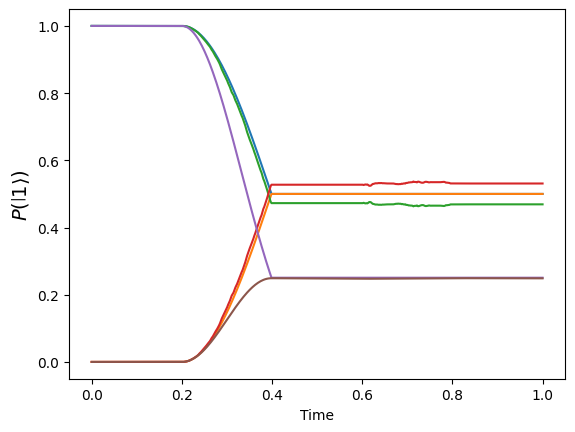

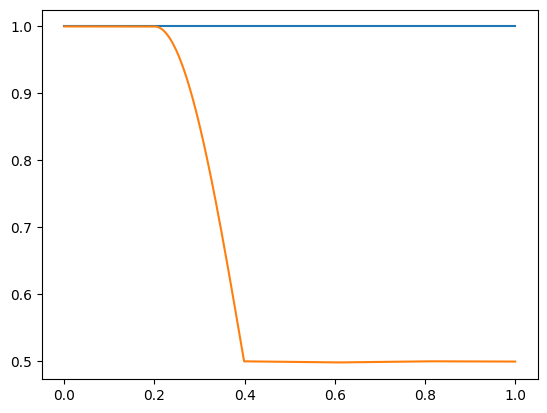

In [29]:
import numpy as np
import matplotlib.pyplot as plt


n_states_time = len(dru_circuit.states_in_time)

over_p0 = np.array([[1, 0]])
over_p1 = np.array([[0, 1]])

Measure_0 = []
Measure_1 = []


Measure_0_noisy = []
Measure_1_noisy = []

Measure_0_noisy_q = []
Measure_1_noisy_q = []

for i in range(n_states_time):

    states_i = dru_circuit.states_in_time[i]
    list_states_np = [state.full() for state in states_i]
    measure_i_0 = [np.abs(over_p0 @ state_np)[0][0]**2 for state_np in list_states_np]
    Measure_0.extend(measure_i_0)
    measure_i_1 = [np.abs(over_p1 @ state_np)[0][0]**2 for state_np in list_states_np]
    Measure_1.extend(measure_i_1)


    states_i = dru_circuit_noisy.states_in_time[i]
    list_states_np = [state.full() for state in states_i]
    measure_i_0 = [np.abs(over_p0 @ state_np)[0][0]**2 for state_np in list_states_np]
    Measure_0_noisy.extend(measure_i_0)
    measure_i_1 = [np.abs(over_p1 @ state_np)[0][0]**2 for state_np in list_states_np]
    Measure_1_noisy.extend(measure_i_1)

    states_i = dru_circuit_noisy_q.states_in_time[i]
    list_states_np = [state.full() for state in states_i]
    measure_i_0 = [np.abs(over_p0 @ state_np)[0][0]**2 for state_np in list_states_np]
    Measure_0_noisy_q.extend(measure_i_0)
    measure_i_1 = [np.abs(over_p1 @ state_np)[0][0]**2 for state_np in list_states_np]
    Measure_1_noisy_q.extend(measure_i_1)

time = np.linspace(0, 1, len(Measure_1))

plt.plot(time, Measure_0)
plt.plot(time, Measure_1)
plt.plot(time, Measure_0_noisy)
plt.plot(time, Measure_1_noisy)
plt.plot(time, Measure_0_noisy_q)
plt.plot(time, Measure_1_noisy_q)

plt.xlabel("Time")
plt.ylabel(r'$P(\left| 1 \right\rangle)$', fontsize=14)

plt.show()


plt.figure()
M_total = [Measure_0[i] + Measure_1[i] for i in range(len(Measure_0))]
plt.plot(time, M_total)
M_total = [Measure_0_noisy_q[i] + Measure_1_noisy_q[i] for i in range(len(Measure_0))]
plt.plot(time, M_total)







In [ ]:
# entanglement
import statistics
def plot_fidelity(model, path_before, entanglement = False):
  before, dict_samples_before_1_qubit = w_r_json('r', path_before)
  # params before
  np.random.seed(42)
  params = np.random.uniform(size=(model.n_qubits*model.num_layers, 3), requires_grad=True)
  bias = np.random.uniform(size=(model.n_qubits*model.num_layers, 3), requires_grad=True)
  # get states
  list_dict_states_spin_dru = []
  for xi in model.X_train:
    #print(xi)
    if model.n_qubits == 1:
      dru_circuit_1_q = CompositeGateProcessor(n_points_pulse_Ri=100, N_qubits = 1)
      state_dru = dru_circuit_1_q.qcircuit_DRU_1_Qubit(params, xi, bias=bias, entanglement = entanglement)
      list_dict_states_spin_dru.append(dru_circuit_1_q.dict_states)
    elif model.n_qubits == 2:
      dru_circuit_2_q = CompositeGateProcessor(n_points_pulse_Ri=100, N_qubits = 2,
                                               ket_dru_0 = tensor(basis(2, 0),basis(2, 0)),
                                               J = 12e6)
      state_dru = dru_circuit_2_q.qcircuit_DRU_2_Qubit(params, xi, bias=bias,  entanglement = entanglement)
      list_dict_states_spin_dru.append(dru_circuit_2_q.dict_states)
    elif model.n_qubits == 4:
      dru_circuit_4_q = CompositeGateProcessor(n_points_pulse_Ri=100, N_qubits = 4,
                                               ket_dru_0 = tensor(basis(2, 0),basis(2, 0),basis(2, 0),basis(2, 0)),
                                                J = 12e6)
      state_dru = dru_circuit_4_q.qcircuit_DRU_4_Qubit(params, xi, bias=bias,
                                               entanglement = entanglement)
      list_dict_states_spin_dru.append(dru_circuit_4_q.dict_states)
  # Obtener fidelidad por estado:
  N_states_bl = len(dict_samples_before_1_qubit)
  N_states_spin = len(list_dict_states_spin_dru)
  print(f"N sates base line {N_states_bl} \n N sates spin {N_states_spin}")
  dict_states_fidelities = []
  for i in range(N_states_bl):
    dict_bl = dict_samples_before_1_qubit[i]
    dict_spin = list_dict_states_spin_dru[i]
    Fidelities_by_state = {}
    try:
      for key in dict_bl:
        state_spin = dict_spin[key]
        state_bl_i = dict_bl[key].numpy()
        state_bl_i  = Qobj(state_bl_i)
        state_spin  = Qobj(state_spin)
        F = fidelity_qutip(state_spin, state_bl_i)
        Fidelities_by_state[key] = F
    except:
      pass
    dict_states_fidelities.append(Fidelities_by_state)
  # Grafica
  # Organizar los datos para facilitar el cálculo del promedio

  #ket_labels = [f'ket_{model.n_qubits}_qubits_{i}' for i in range(len(dict_states_fidelities[0]))]
  ket_labels = list(dict_states_fidelities[0].keys())
  #if entanglement == True and model.n_qubits == 2:
  #  ket_labels_e = []
  #  for i in range(len(dict_states_fidelities[0])):
  #    ket_labels_e.append()

  promedios = {ket: [] for ket in ket_labels}

  for diccionario in dict_states_fidelities:
      for ket, valor in diccionario.items():
          promedios[ket].append(valor)

  # Calcular el promedio para cada 'ket_1_qubit_i'
  promedios_mean = {ket: sum(valores) / len(valores) for ket, valores in promedios.items()}
  promedios_desviacion = {key: statistics.stdev(values) for key, values in promedios.items()}
  # Crear el diagrama de barras
  plt.figure(figsize=(8, 4))
  plt.grid()
  plt.bar(promedios_mean.keys(), promedios_mean.values(), yerr=list(promedios_desviacion.values()), capsize=5, color='blue', alpha=0.7)
  plt.xlabel('Qubits')
  plt.ylabel('Promedio')
  plt.title(f'Promedio de ket_{model.n_qubits}_qubits_i a través de diccionarios')
  plt.xticks(rotation=45)
  plt.ylim(min(promedios_mean.values()) - 0.00000001, max(promedios_mean.values()) + 0.00000001)

  plt.show()